# Лабораторная работа 3.1 
Трунов Антон М8О-304Б Вариант 16

# Задание
Используя таблицу значений $Y_i$ функции $y=\ln{x}+x$, вычисленных в точках $X_i =\{0.1,0.5,0.9,1.3\}$ построить интерполяционные многочлены Лагранжа и Ньютона, проходящие через точки $\{X_i, Y_i\}$. Вычислить значение погрешности интерполяции в точке $X^*=0.8$.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [15, 8]

In [2]:
def fig_plot(f,m,x_nodes,y_nodes, X, PolyFunc):
    plt.grid()
    P_m = [PolyFunc(y_nodes, x_nodes, m, x) for x in X]
    plt.plot(X,f(X),label='Original function')
    plt.plot(x_nodes,y_nodes,'o',label='Nodes')
    plt.plot(X,P_m,label='P_%s' % m)
    plt.legend()
    plt.show()

In [3]:
def l_k(xn,x,m,k):
    l = 1
    for i in range(k):
        l *= (x-xn[i]) / (xn[k]-xn[i])
    for i in range(k+1,m+1):
        l *= (x-xn[i]) / (xn[k]-xn[i])
    return l

In [4]:
def Langrange (y_nodes, x_nodes, m, x):
    return sum(y_nodes[j] * l_k(x_nodes,x,m,j) for j in range(m+1))

In [5]:
def Newton_table(y_nodes, x, m):
    A = np.zeros((m+1,m+1))
    A[0,:] = y_nodes[:]
    for i in range(m):
        for j in range(m-i):
            A[i+1,j] = (A[i,j]-A[i,j+1]) / (x[j]-x[j+1+i])
    return A

In [6]:
def n_k(x, xn, m, k):
    l = 1
    for i in range(k):
        l *= (x-xn[i])
    return l

In [7]:
def Newton (y_nodes, x_nodes, m, x):
    F = Newton_table(y_nodes, x_nodes, m)
    return sum(F[j,0] * n_k(x, x_nodes, m, j) for j in range(m+1))

In [8]:
f = lambda x: np.log(x) + x

In [9]:
x_nodes = np.array([0.1, 0.5, 1.1, 1.3,1.5])
y_nodes = f(x_nodes)
m = x_nodes.shape[0] - 1 
X = np.arange(0.01, 1.5, 0.01)

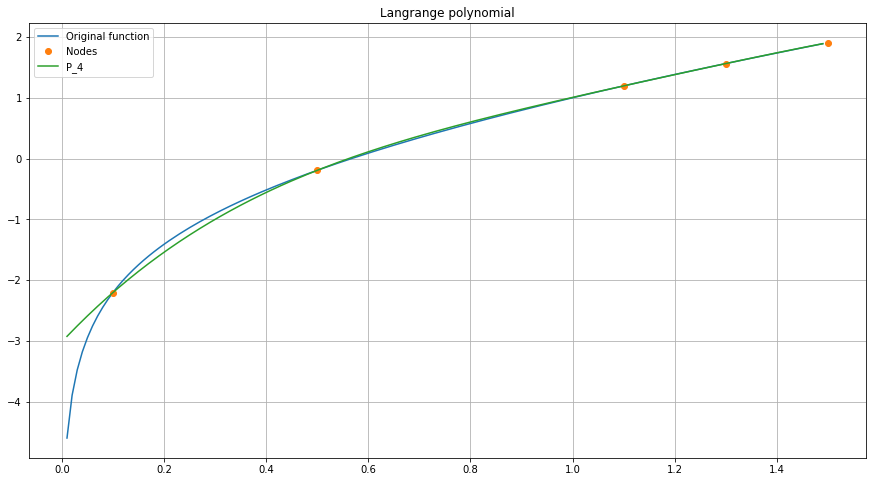

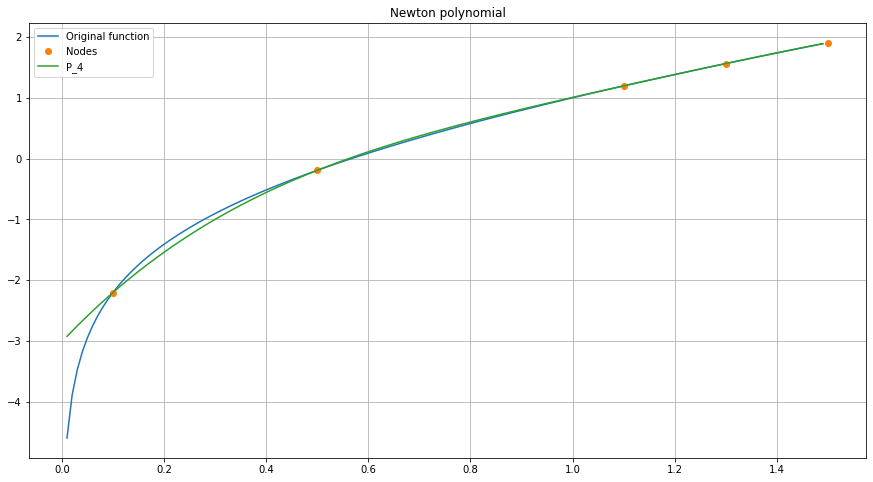

In [10]:
plt.title('Langrange polynomial')
fig_plot(f, m, x_nodes, y_nodes,X, Langrange)
plt.title('Newton polynomial')
fig_plot(f, m, x_nodes, y_nodes,X, Newton)

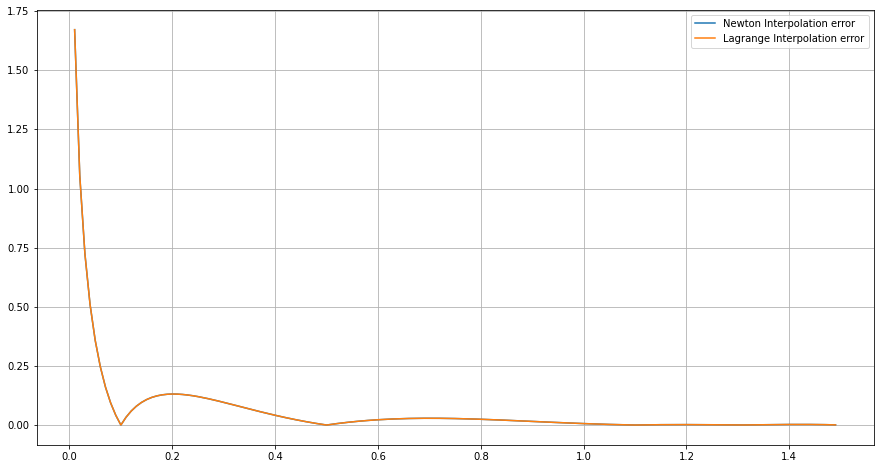

Interpolation error at X* = 0.8: 0.02440363699661119


In [11]:
N_m = [Newton(y_nodes, x_nodes, m, x) for x in X]
L_m = [Langrange(y_nodes, x_nodes, m, x) for x in X]
plt.plot(X,abs(f(X)-N_m), label='Newton Interpolation error')
plt.plot(X,abs(f(X)-N_m), label='Lagrange Interpolation error')
plt.legend()
plt.grid()
plt.show()
x_err = 0.8
print("Interpolation error at X* = %s:" %x_err, abs(f(x_err) - Newton(y_nodes, x_nodes, m, x_err)))